In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 5

In [4]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    )

Found 20638 files belonging to 15 classes.


In [5]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

645

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[ 5 12  6  5  1 12 12  6  3 10 14 14 12 14 10  9  5  3  5 11  6 13  2  5
 10 10  1  5 12 12  7  5]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[162. 148. 148.]
  [142. 128. 128.]
  [149. 135. 135.]
  ...
  [146. 134. 134.]
  [157. 145. 145.]
  [161. 149. 149.]]

 [[146. 132. 132.]
  [177. 163. 163.]
  [173. 159. 159.]
  ...
  [176. 164. 164.]
  [182. 170. 170.]
  [169. 157. 157.]]

 [[184. 170. 170.]
  [147. 133. 133.]
  [103.  89.  89.]
  ...
  [162. 150. 150.]
  [166. 154. 154.]
  [168. 156. 156.]]

 ...

 [[183. 171. 175.]
  [157. 145. 149.]
  [166. 154. 158.]
  ...
  [167. 154. 161.]
  [171. 158. 165.]
  [172. 159. 166.]]

 [[166. 154. 158.]
  [148. 136. 140.]
  [150. 138. 142.]
  ...
  [172. 159. 166.]
  [172. 159. 166.]
  [168. 155. 162.]]

 [[178. 166. 170.]
  [177. 165. 169.]
  [173. 161. 165.]
  ...
  [172. 159. 166.]
  [168. 155. 162.]
  [160. 147. 154.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[138. 132. 158.]
  [127. 121. 147.]
  [120. 114. 140.]
  ...
  [104.  99. 119.]
  [108. 103. 123.]
  [112. 107. 127.]]

 [[127. 121. 147.]
  [123. 117. 143.]
  [126. 120. 146.]
  ...
  [104.  99. 119.]
  [101.  96. 116.]
  [102.  97. 117.]]

 [[135. 129. 155.]
  [129. 123. 149.]
  [126. 120. 146.]
  ...
  [ 98.  93. 113.]
  [ 94.  89. 109.]
  [ 97.  92. 112.]]

 ...

 [[142. 134. 155.]
  [134. 126. 147.]
  [129. 121. 142.]
  ...
  [124. 116. 131.]
  [126. 118. 133.]
  [133. 125. 140.]]

 [[139. 131. 152.]
  [134. 126. 147.]
  [132. 124. 145.]
  ...
  [121. 113. 128.]
  [125. 117. 132.]
  [125. 117. 132.]]

 [[135. 127. 148.]
  [133. 125. 146.]
  [135. 127. 148.]
  ...
  [130. 122. 137.]
  [134. 126. 141.]
  [128. 120. 135.]]]


In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


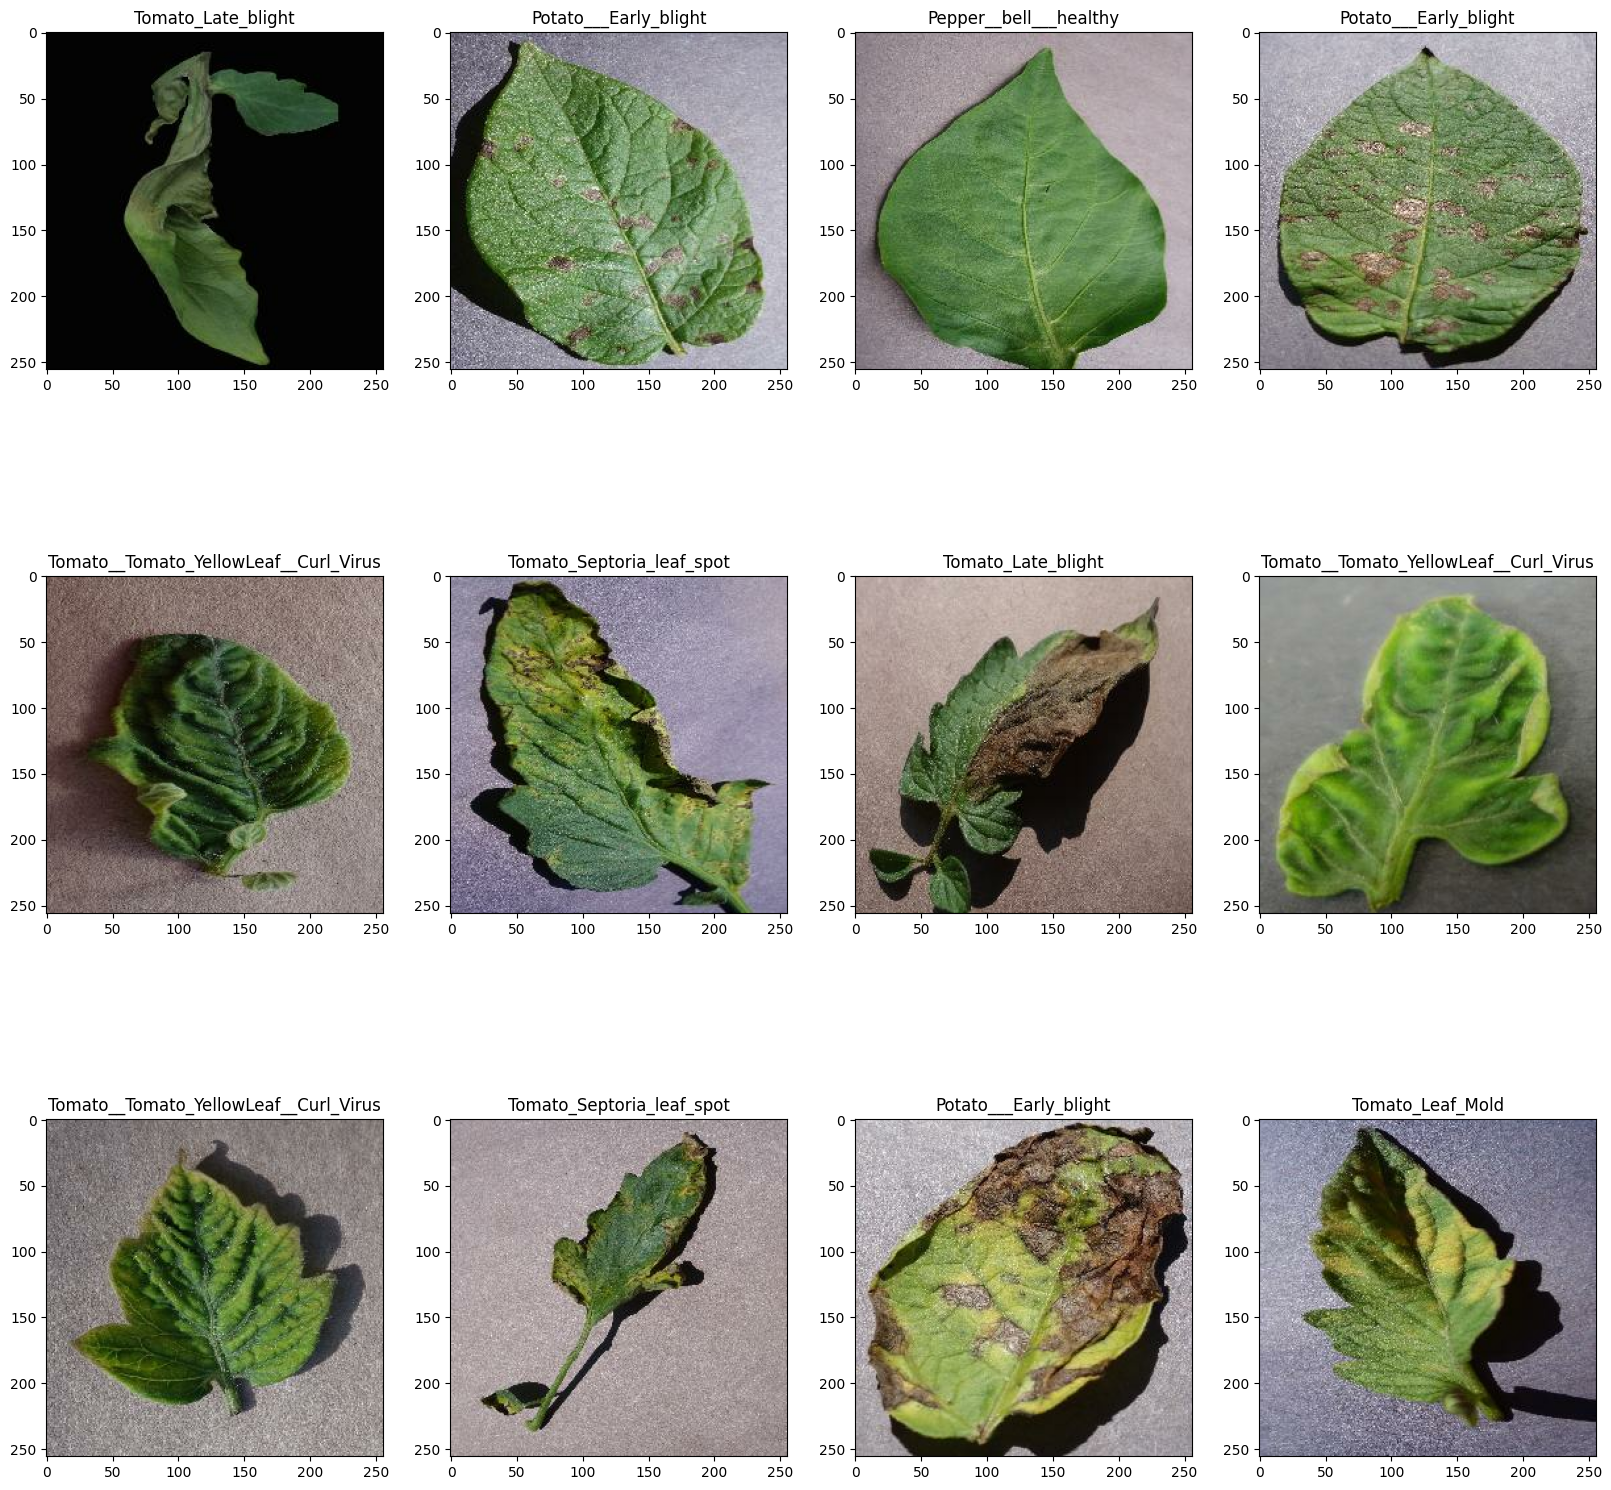

In [11]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])